# Wine Clustering

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

Load our cleaned data, where we have converted the province and variety from a categorical attribute to a numerical attribute and extracted the vintage of each wine form the title. After removing the samples with null values, we reduced the size of our dataset from 125000 to 22000.

In [2]:
data = pd.read_csv("3column_clean.csv")
print(data.shape)
data.head()

(125105, 17)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0,690,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,450,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2,436,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,3,479,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2,440,2012


Extract the data we want to cluster and analyze for our project. 

In [3]:
clustering_data = data.loc[:,['province_id','variety_numerical','vintage']]
clustering_data.head()

,province_id,variety_numerical,vintage
0,0,690,2013
1,1,450,2011
2,2,436,2013
3,3,479,2013
4,2,440,2012


Pick a n value for the number of clusters we want. 

A helper function to count the number of samples in each cluster.

In [4]:
def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return



Clusters:
{0: 36752, 1: 40146, 2: 8719, 3: 10, 4: 3155, 5: 9887, 6: 8619, 7: 17817}


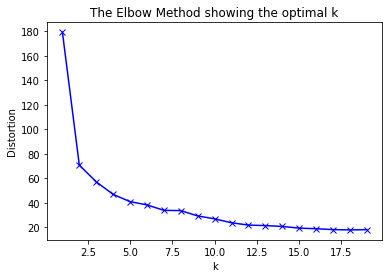

In [5]:
n = 8
cluster = KMeans(n_clusters = n, random_state = 0).fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)
data.loc[:,['province_id','variety_numerical','vintage']]
X = np.array(list(zip(data.loc[:,'province_id'], data.loc[:,'variety_numerical']))).reshape(len(data.loc[:,'province_id']),2)

distortions=[]
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

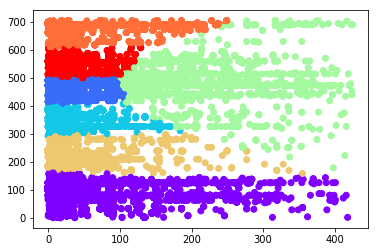

In [6]:
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

## add analysis

In [7]:
# Our data set has to many entries to run this algo.

'''
cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='average').fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)
'''

'\ncluster = AgglomerativeClustering(n_clusters=n, affinity=\'euclidean\', linkage=\'average\').fit(clustering_data)\n\nlabels = cluster.labels_\nprint("\n\nClusters:")\nlabel_count(labels)\n'

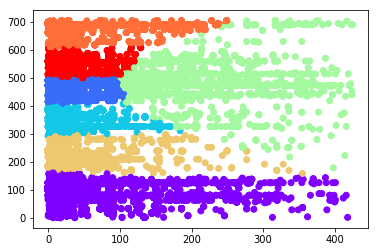

In [8]:
# plot for agglomerative clustering
'''
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()
'''

## add analysis

In [9]:
warnings.simplefilter('ignore')
gmm = mixture.GaussianMixture(n_components=n).fit(clustering_data)
labels = gmm.predict(clustering_data)
print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 26802, 1: 28954, 2: 146, 3: 10, 4: 5953, 5: 11971, 6: 21840, 7: 29429}


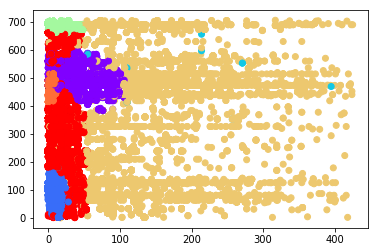

In [10]:
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

## add analysis

Cluster our data based on the points and price of each wine.

In [11]:
data.dropna(subset=['points','price'],inplace=True)
clustering_data = data.loc[:,['points','price']]
clustering_data.head()

,points,price
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0


In [12]:
cluster = KMeans(n_clusters = n, random_state = 0).fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 33503, 1: 778, 2: 7, 3: 17198, 4: 203, 5: 60552, 6: 4310, 7: 40}


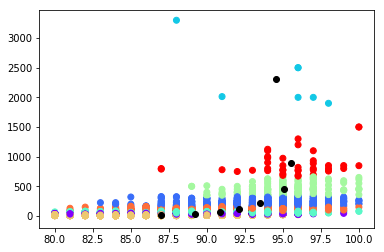

In [13]:
plt.scatter(data.loc[:,'points'], data.loc[:,'price'], c=labels, cmap='rainbow')    
plt.scatter(cluster.cluster_centers_[:,0] ,cluster.cluster_centers_[:,1], color='black') 
plt.show()

# conclusion

We ran GMM, KMeans, and attempted Agglomerative Clustering. We were able to run GMM and KMeans clustering on our data withput any issues. However, due to the size of our dataset ~125K entries, we were unable to successfuly run Agglomerative on our data. 

We used these clustering methods to explore and visulize our data, and were looking for valuble insights. 

We found that the most meaningfull cluster was using the GMM algorithm, and showed us that we have multiple different clusters of varying size and shape. We have clusters that are both densly populated and a wide distribution of points scattered across the visualization plot. 